# Stochastic Models in Finance: TP3
## Options à barrières et lookback
By: 
- Adonis JAMAL
- Ayoub EL KBADI
- Fotios KAPOTOS

In [25]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [26]:
# Model values
S0 = 100    # initial stock price
K = 100     # strike price
T = 1.0     # time to maturity in years
r = 0.05    # risk-free rate
sigma = 0.2 # volatility
d = 12      # number of observations
B = 140     # barrier level
L = 95      # lookback level
N = 10**4   # number of simulations

1. Prix Monte Carlo (avec intervalle de confiance) de l’option d’achat à barrière up-and-out de niveau B en fonction de S0.

In [27]:
def pricing_barrier_up_and_out(S0, K, T, r, sigma, B, d, N, barrier=True):
    dt = T / d
    Z = np.random.normal(0, 1, (N, d))

    # Paths
    drift = (r - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt)

    log_returns = drift + diffusion * Z
    log_path = np.cumsum(log_returns, axis=1)
    S_path = S0 * np.exp(log_path)

    # Payoff
    S_T = S_path[:, -1]
    call_payoff = np.maximum(S_T - K, 0)

    # Barrier condition
    if barrier:
        max_price_per_path = np.max(S_path, axis=1)
        call_payoff = call_payoff * (max_price_per_path < B)

    discounted_payoff = np.exp(-r * T) * call_payoff

    # Price and 95% confidence interval
    price = np.mean(discounted_payoff)
    std_dev = np.std(discounted_payoff)
    confidence_interval = 1.96 * std_dev / np.sqrt(N)

    return price, confidence_interval

C:\Users\adoni\AppData\Local\Temp\ipykernel_13208\1081603854.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(S0_range, results_standard['price'], 'k--', label='Standard Call (Vanilla)', color='black')


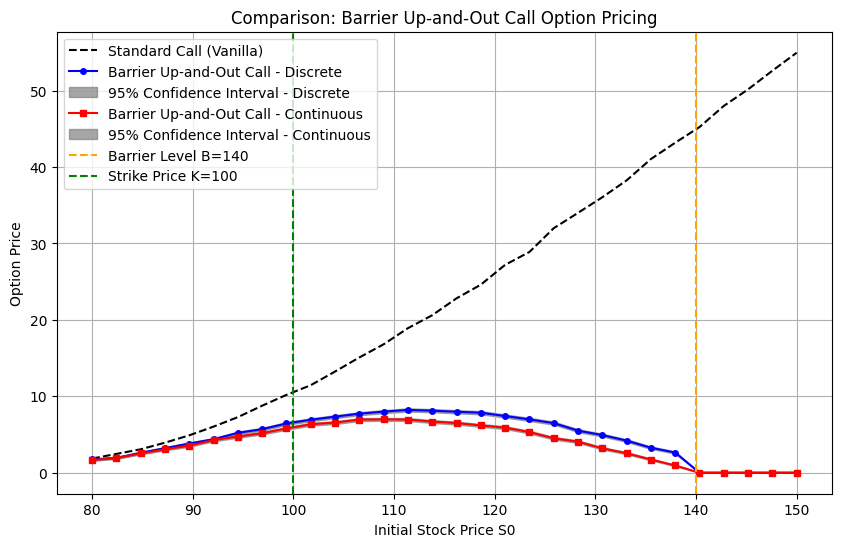

In [28]:
S0_range = np.linspace(80, 150, 30)

results_discrete = {'price': [], 'conf_int': []}
results_continuous = {'price': [], 'conf_int': []}
results_standard = {'price': [], 'conf_int': []}

for S in S0_range:
    if S >= B:
        results_discrete['price'].append(0)
        results_discrete['conf_int'].append(0)

        results_continuous['price'].append(0)
        results_continuous['conf_int'].append(0)

        # Standard call option price
        price, conf_int = pricing_barrier_up_and_out(S, K, T, r, sigma, B, d=1, N=N, barrier=False)
        results_standard['price'].append(price)
        results_standard['conf_int'].append(conf_int)
        continue

    # Discrete
    price_discrete, conf_int_discrete = pricing_barrier_up_and_out(S, K, T, r, sigma, B, d=12, N=N, barrier=True)
    results_discrete['price'].append(price_discrete)
    results_discrete['conf_int'].append(conf_int_discrete)

    # Continuous
    price_continuous, conf_int_continuous = pricing_barrier_up_and_out(S, K, T, r, sigma, B, d=252, N=N, barrier=True)
    results_continuous['price'].append(price_continuous)
    results_continuous['conf_int'].append(conf_int_continuous)

    # Standard
    price_standard, conf_int_standard = pricing_barrier_up_and_out(S, K, T, r, sigma, B, d=1, N=N, barrier=False)
    results_standard['price'].append(price_standard)
    results_standard['conf_int'].append(conf_int_standard)

for res in [results_discrete, results_continuous, results_standard]:
    res['price'] = np.array(res['price'])
    res['conf_int'] = np.array(res['conf_int'])

# Plot
plt.figure(figsize=(10, 6))

# Standard
plt.plot(S0_range, results_standard['price'], 'k--', label='Standard Call (Vanilla)', color='black')

# Discrete Barrier
plt.plot(S0_range, results_discrete['price'], 'b-o', markersize=4, label='Barrier Up-and-Out Call - Discrete')
plt.fill_between(S0_range, results_discrete['price'] - results_discrete['conf_int'], results_discrete['price'] + results_discrete['conf_int'], color='gray', alpha=0.7, label='95% Confidence Interval - Discrete')

# Continuous Barrier
plt.plot(S0_range, results_continuous['price'], 'r-s', markersize=4, label='Barrier Up-and-Out Call - Continuous')
plt.fill_between(S0_range, results_continuous['price'] - results_continuous['conf_int'], results_continuous['price'] + results_continuous['conf_int'], color='gray', alpha=0.7, label='95% Confidence Interval - Continuous')

plt.axvline(B, color='orange', linestyle='--', label=f'Barrier Level B={B}')
plt.axvline(K, color='green', linestyle='--', label=f'Strike Price K={K}')
plt.title('Comparison: Barrier Up-and-Out Call Option Pricing')
plt.xlabel('Initial Stock Price S0')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

Le call standard représente une borne maximale pour le call à barrière up-and-out, et augmente avec S0. Le prix de l'option à barrière sera toujours inférieur ou égal au prix du call standard, car l'option devient nulle si le prix de l'actif sous-jacent atteint la barrière B. Ainsi, lorsque S0 approche de B, le prix de l'option à barrière diminue, car la probabilité que l'option soit désactivée augmente.

Quant à la comparaison avec la variante continue, on observe que les deux courbes obtenues se comportent de manière similaire (une augmentation avec S0 et une diminution lorsque S0 approche de B, jusqu'à devenir nulle). Cependant, la variante continue est toujours légèrement inférieure à la variante discrète. Cela s'explique par le fait que dans la variante continue, l'option peut être désactivée à tout moment, tandis que dans la variante discrète, l'option n'est désactivée qu'à des points de temps spécifiques. Par conséquent, la probabilité de désactivation est plus élevée dans la variante continue, ce qui conduit à un prix légèrement inférieur pour l'option à barrière up-and-out.

Finalement, on remarque que quand on s'approche de la barrière B, la décroissance du prix de l'option à barrière devient plus abrupte, notamment pour la variante discrète. Cela est dû au fait que lorsque S0 est proche de B, même une petite augmentation du prix de l'actif sous-jacent peut entraîner la désactivation de l'option, ce qui réduit considérablement sa valeur.

2. Prix Monte Carlo de l’option d’achat à barrière up-and-out (variante discrète) en fonction du nombre de dates d’observations.

3. Call down-and-in de niveau L.

4. Monte Carlo conditionnel pour le pricing du call down-and-in.

5. (Pour aller plus loin) réductions de variance en fonction de la barrière L.